In [1]:
%config IPCompleter.greedy=True
%pylab inline

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import librosa



Populating the interactive namespace from numpy and matplotlib


# Music Genre Classification - Neural Network Training on Spectrogram Images

## Having an overview on genres images

In [36]:
import os
import time

start = time.time()


mp3_filepaths = []

for g in genres:
    for filename in os.listdir(f'{mp3_dir_path}/{g}'):  #RENAME PATH HERE
        path = f'{mp3_dir_path}{g}/{filename}'
        mp3_filepaths.append(path)
    
# mp3_filepaths = mp3_filepaths[:2]

nb_files = len(mp3_filepaths)




end = time.time()
print(f"Created {nb_files} spectrograms in {end - start} s")


skipped: ./datasets/songs/genres_mp3/rock/.DS_Store


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00096.mp3_spectrogram_FULLSIZE.png
Processing 925/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00082.mp3_spectrogram_FULLSIZE.png
Processing 926/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00069.mp3_spectrogram_FULLSIZE.png
Processing 927/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00055.mp3_spectrogram_FULLSIZE.png
Processing 928/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00041.mp3_spectrogram_FULLSIZE.png
Processing 929/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00057.mp3_spectrogram_FULLSIZE.png
Processing 930/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00043.mp3_spectrogram_FULLSIZE.png
Processing 931/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00094.mp3_spectrogram_FULLSIZE.png
Processing 932/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00080.mp3_spectrogram_FULLSIZE.png
Processing 933/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00081.mp3_spectrogram_FULLSIZE.png
Processing 934/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00095.mp3_spectrogram_FULLSIZE.png
Processing 935/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00042.mp3_spectrogram_FULLSIZE.png
Processing 936/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00056.mp3_spectrogram_FULLSIZE.png
Processing 937/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00019.mp3_spectrogram_FULLSIZE.png
Processing 938/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00031.mp3_spectrogram_FULLSIZE.png
Processing 939/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00025.mp3_spectrogram_FULLSIZE.png
Processing 940/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00024.mp3_spectrogram_FULLSIZE.png
Processing 941/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00030.mp3_spectrogram_FULLSIZE.png
Processing 942/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00018.mp3_spectrogram_FULLSIZE.png
Processing 943/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00026.mp3_spectrogram_FULLSIZE.png
Processing 944/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00032.mp3_spectrogram_FULLSIZE.png
Processing 945/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00033.mp3_spectrogram_FULLSIZE.png
Processing 946/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00027.mp3_spectrogram_FULLSIZE.png
Processing 947/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00023.mp3_spectrogram_FULLSIZE.png
Processing 948/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00037.mp3_spectrogram_FULLSIZE.png
Processing 949/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00036.mp3_spectrogram_FULLSIZE.png
Processing 950/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00022.mp3_spectrogram_FULLSIZE.png
Processing 951/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00034.mp3_spectrogram_FULLSIZE.png
Processing 952/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00020.mp3_spectrogram_FULLSIZE.png
Processing 953/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00008.mp3_spectrogram_FULLSIZE.png
Processing 954/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00009.mp3_spectrogram_FULLSIZE.png
Processing 955/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00021.mp3_spectrogram_FULLSIZE.png
Processing 956/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00035.mp3_spectrogram_FULLSIZE.png
Processing 957/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00038.mp3_spectrogram_FULLSIZE.png
Processing 958/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00010.mp3_spectrogram_FULLSIZE.png
Processing 959/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00004.mp3_spectrogram_FULLSIZE.png
Processing 960/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00005.mp3_spectrogram_FULLSIZE.png
Processing 961/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00011.mp3_spectrogram_FULLSIZE.png
Processing 962/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00039.mp3_spectrogram_FULLSIZE.png
Processing 963/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00007.mp3_spectrogram_FULLSIZE.png
Processing 964/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00013.mp3_spectrogram_FULLSIZE.png
Processing 965/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00012.mp3_spectrogram_FULLSIZE.png
Processing 966/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00006.mp3_spectrogram_FULLSIZE.png
Processing 967/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00002.mp3_spectrogram_FULLSIZE.png
Processing 968/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00016.mp3_spectrogram_FULLSIZE.png
Processing 969/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00017.mp3_spectrogram_FULLSIZE.png
Processing 970/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00003.mp3_spectrogram_FULLSIZE.png
Processing 971/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00015.mp3_spectrogram_FULLSIZE.png
Processing 972/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00001.mp3_spectrogram_FULLSIZE.png
Processing 973/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00029.mp3_spectrogram_FULLSIZE.png
Processing 974/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00028.mp3_spectrogram_FULLSIZE.png
Processing 975/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00000.mp3_spectrogram_FULLSIZE.png
Processing 976/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00014.mp3_spectrogram_FULLSIZE.png
Processing 977/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00073.mp3_spectrogram_FULLSIZE.png
Processing 978/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00067.mp3_spectrogram_FULLSIZE.png
Processing 979/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00098.mp3_spectrogram_FULLSIZE.png
Processing 980/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00099.mp3_spectrogram_FULLSIZE.png
Processing 981/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00066.mp3_spectrogram_FULLSIZE.png
Processing 982/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00072.mp3_spectrogram_FULLSIZE.png
Processing 983/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00058.mp3_spectrogram_FULLSIZE.png
Processing 984/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00064.mp3_spectrogram_FULLSIZE.png
Processing 985/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00070.mp3_spectrogram_FULLSIZE.png
Processing 986/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00071.mp3_spectrogram_FULLSIZE.png
Processing 987/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00065.mp3_spectrogram_FULLSIZE.png
Processing 988/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00059.mp3_spectrogram_FULLSIZE.png
Processing 989/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00061.mp3_spectrogram_FULLSIZE.png
Processing 990/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00075.mp3_spectrogram_FULLSIZE.png
Processing 991/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00049.mp3_spectrogram_FULLSIZE.png
Processing 992/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00048.mp3_spectrogram_FULLSIZE.png
Processing 993/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00074.mp3_spectrogram_FULLSIZE.png
Processing 994/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00060.mp3_spectrogram_FULLSIZE.png
Processing 995/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00076.mp3_spectrogram_FULLSIZE.png
Processing 996/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00062.mp3_spectrogram_FULLSIZE.png
Processing 997/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00089.mp3_spectrogram_FULLSIZE.png
Processing 998/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00088.mp3_spectrogram_FULLSIZE.png
Processing 999/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00063.mp3_spectrogram_FULLSIZE.png
Processing 1000/1002...


/usr/local/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


-> created ./datasets/spectrograms/rock.00077.mp3_spectrogram_FULLSIZE.png
Processing 1001/1002...
Created 1002 spectrograms in 235.82585501670837 s


### Traininig a Convolutionnal Neural network

In [48]:
from keras_preprocessing.image import ImageDataGenerator
import shutil

img_height, img_width = 64, 64
batch_size = 32

train_data_dir = "./datasets/spectrograms/"

shutil.rmtree(f"{train_data_dir}.ipynb_checkpoints") 

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    subset='validation') # set as validation data



Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [38]:
import tensorflow as tf
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizers.RMSprop(lr=0.0005, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 31, 31, 64)       

In [ ]:

#Fitting keras model, no test gen for now
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

#STEP_SIZE_TEST=test_generator.n//test_generator.batch_size


history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10,
)
model.evaluate_generator(generator=validation_generator, steps=STEP_SIZE_VALID
)

Epoch 1/10
25/25 [==============================] - 309s 12s/step - loss: 2.3110 - accuracy: 0.0925 - val_loss: 2.2892 - val_accuracy: 0.1823
Epoch 2/10
25/25 [==============================] - ETA: 0s - loss: 2.3075 - accuracy: 0.0988

8/8 [==============================] - 0s 1ms/step - loss: 1.1549 - accuracy: 0.6160


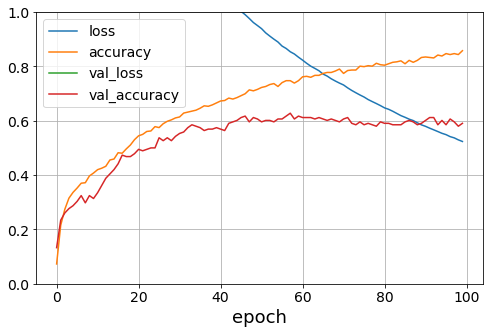

In [22]:
mse_test = model.evaluate(X_test, y_test)

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel("epoch")
plt.show()

In [31]:
# model_path = "./models/musicgenre_nn_classifier_v1.h5"
# model.save(model_path)
# model = keras.models.load_model(model_path)
model.predict(X)

array([[7.77258798e-02, 4.84767035e-02, 1.19989716e-01, ...,
        3.31462100e-02, 4.57172915e-02, 2.26929024e-01],
       [1.99620739e-01, 1.19231148e-02, 2.89957635e-02, ...,
        7.82633666e-03, 9.31608677e-02, 1.76279381e-01],
       [4.08248037e-01, 3.38145555e-03, 2.72053272e-01, ...,
        5.24243228e-02, 1.27489576e-02, 2.03344017e-01],
       ...,
       [1.97777580e-02, 3.51431445e-05, 3.26157920e-02, ...,
        3.66544991e-05, 2.13286621e-04, 8.49649131e-01],
       [1.01545058e-01, 7.40389060e-03, 2.46231332e-01, ...,
        3.16512473e-02, 7.19827265e-02, 4.71968353e-01],
       [4.85825539e-02, 1.07151400e-02, 2.25675687e-01, ...,
        7.91723467e-03, 1.41044026e-02, 5.30412078e-01]], dtype=float32)